<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/neural_network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating the Dataset to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state=42
)

In [ ]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'laybel': y})
df.head()

,X0,X1,laybel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


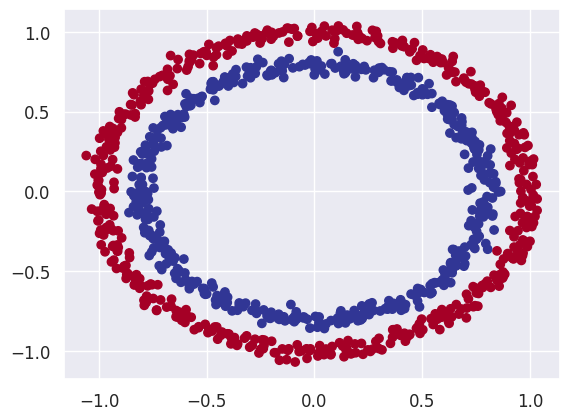

In [ ]:
## Visualizing the data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

performance = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6999 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5070
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5200
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5170
Epoch 11/

<Axes: >

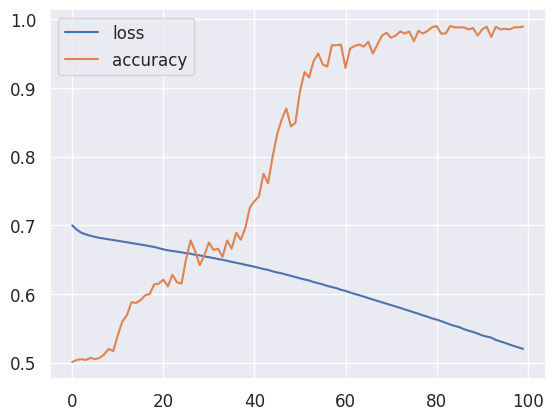

In [ ]:
pd.DataFrame(performance.history).plot()

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


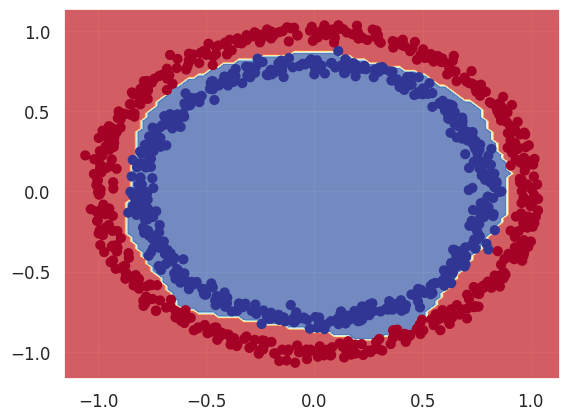

In [ ]:
plot_decision_boundary(model, X, y)

**Understanding the Sigmoid activation function**

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

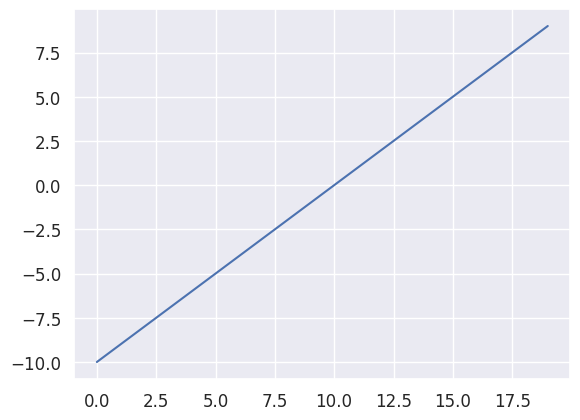

In [ ]:
## Ploting the raw data

plt.plot(A)

In [ ]:
 ##Applying sigmoid function to 'A'
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

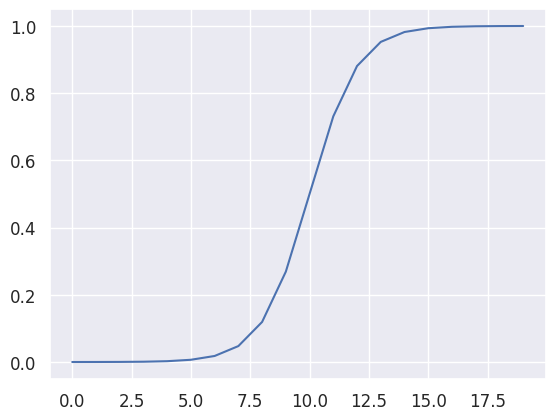

In [ ]:
##Ploting the A after applying the sigmoid function
plt.plot(sigmoid(A))

**Understanding the Rectifier activation function**

In [ ]:
def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

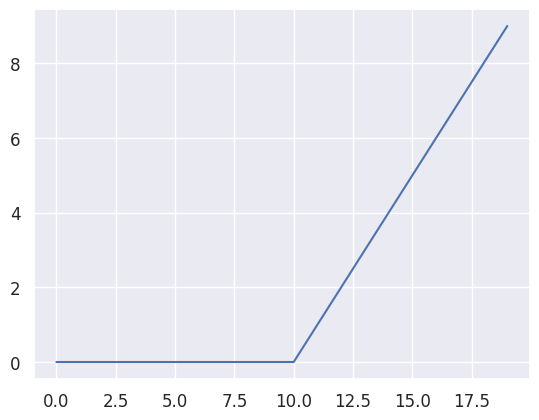

In [ ]:
plt.plot(relu(A))

**Understanding the Linear activation function**

I will be the same as original

## Dividing the dataset and training the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

performance_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.4450
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4600
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5625
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6600
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6263
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.7700
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.7563
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7962
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7887
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8250
Epoch 11/25
25/25 [

In [ ]:
#Evaluating the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 1.0000


[0.04892965406179428, 1.0]

<Axes: >

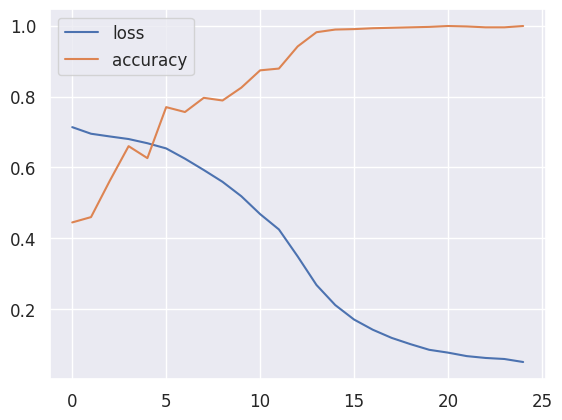

In [ ]:
#Ploting the model performance
pd.DataFrame(performance_1.history).plot()

## Finding the Best Learning Rate

* A learning rate **callback** -- You can think of a callback as an extra piece of functionality, you can add it to your model at the time of training

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## Callback has to done before the fitting the model:-
""" At the beginning of every epoch,
this callback gets the updated learning rate value from schedule function provided at __init__,
with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.
"""

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fitting the model (this time passing lr_scheduler callback)
performance_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

In [ ]:
model_2.evaluate(X_train, y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.9213 - accuracy: 0.5200


[0.9213025569915771, 0.5199999809265137]

<Axes: >

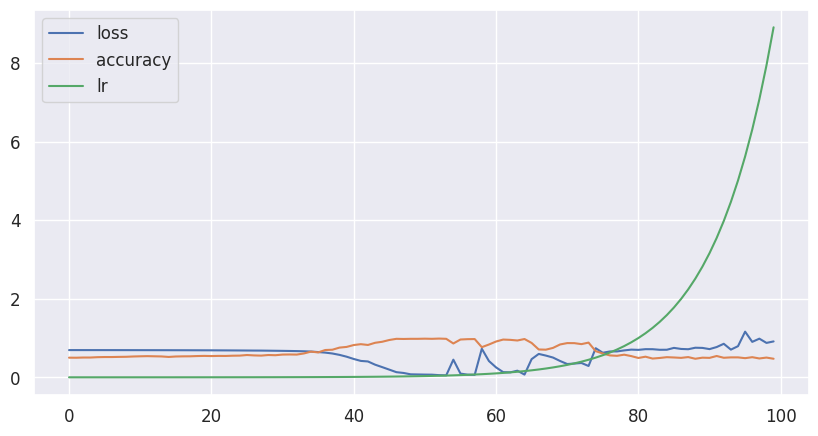

In [ ]:
pd.DataFrame(performance_2.history).plot(figsize=(10,5))

Text(0.5, 1.0, 'Learning rate vs Loss')

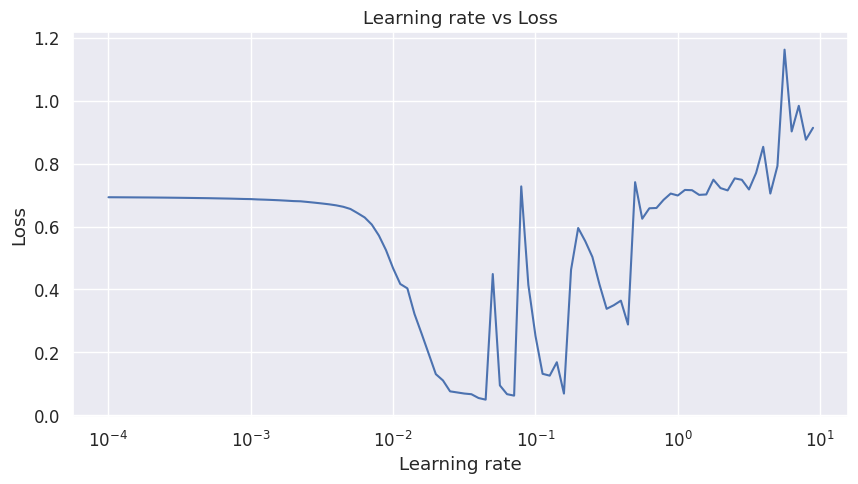

In [ ]:
## Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 5))
plt.semilogx(lrs, performance_2.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
## We can select the lowest point (not after the hike) as the learning rate for the model

In [ ]:
## Let's try using higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.015),
    metrics = ['accuracy']
)

performance_3 = model_3.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7013 - accuracy: 0.4425
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5638
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5938
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5825
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6338
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.7250
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.7987
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8625
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.9725
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.9825
Epoch 11/25
25/25 [

In [ ]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9950


[0.01897631399333477, 0.9950000047683716]

<Axes: >

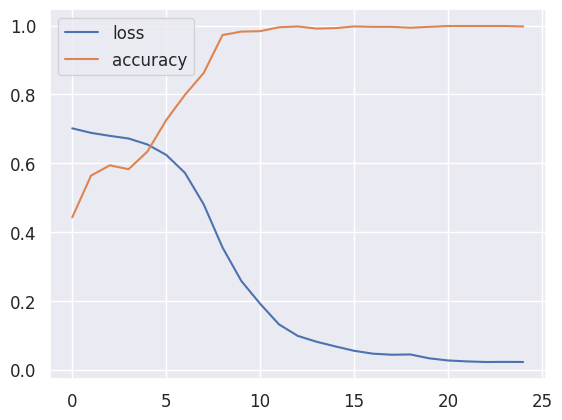

In [ ]:
## ploting the model performance (i tried epochs=100 and i got more accuracy at the 18-20 epochs)
pd.DataFrame(performance_3.history).plot()

In [ ]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 1.0000


[0.04892965406179428, 1.0]

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.0713 - accuracy: 0.4200


[1.0712653398513794, 0.41999998688697815]

In [ ]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9950


[0.01897631399333477, 0.9950000047683716]

In [ ]:
model_3_pre = model_3.predict(X_test)

7/7 [==============================] - 0s 3ms/step


**More Classification Evaluation methods**

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

**Creating the Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, (model_3_pre > 0.5)))

[[116   0]
 [  1  83]]


## Prettifying the Confusion matrix

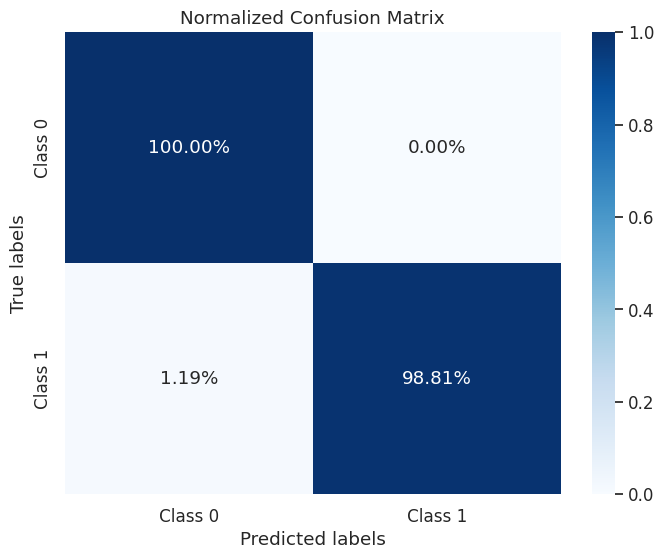

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, (model_3_pre > 0.5))

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
class_names = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap with percentages
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Adjust font scale for better readability
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()


## MultiClass Classification Model

In [ ]:
## getting the data from 'tensorflow'
from tensorflow.keras.datasets import fashion_mnist
# https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [ ]:
## The dataset has already been divided in to training and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

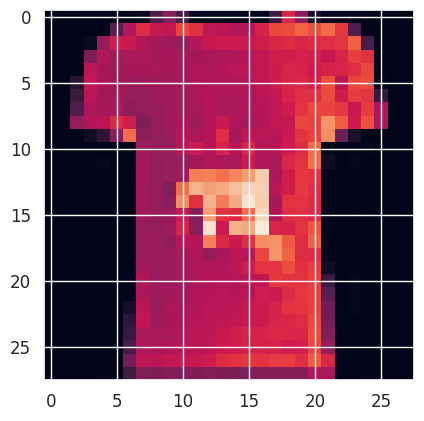

In [ ]:
plt.imshow(train_data[180])

In [ ]:
train_data[180].shape

(28, 28)

In [ ]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(names)

10

(-0.5, 27.5, 27.5, -0.5)

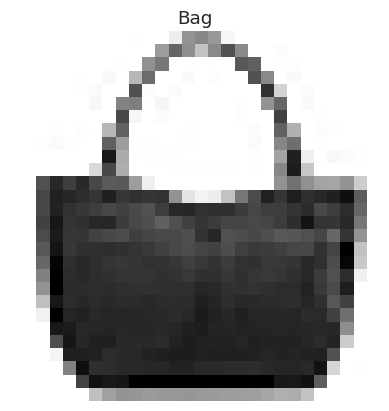

In [ ]:
index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(names[train_labels[index]])
plt.axis(False)

## Building the Model

for the multiclass classification model, we can use the simmilar model as above

However we have to change some of the things
* Input shape = 28x28 (shape of the image)
* Output shape = 10 (1 per class)
* Loss function = categoricalentropy (for multiclass classification).
* Output layer activation = softmax (for multiclass classification)

In [ ]:
## our data has to be flattened (from 28*28 to 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
 28 * 28

784

**There are two types of Categorical CrossEnctropy:**
* Categorical_Crossentropy - when you have encoded the labels (OneHotEncode)
* SparseCategorical_Crossentropy - when you have not encoded the labels

tf.one_hot(train_labels, depth=10)

In [ ]:
# tf.one_hot(train_labels, depth=10)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

non_norm_history = model_4.fit(train_data, train_labels, epochs=20, validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5374 - accuracy: 0.2555 - val_loss: 1.7164 - val_accuracy: 0.3254
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4900 - accuracy: 0.3940 - val_loss: 1.3254 - val_accuracy: 0.4474
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2225 - accuracy: 0.4998 - val_loss: 1.1952 - val_accuracy: 0.4741
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0832 - accuracy: 0.5446 - val_loss: 1.1134 - val_accuracy: 0.5152
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0488 - accuracy: 0.5589 - val_loss: 1.0650 - val_accuracy: 0.5730
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0357 - accuracy: 0.5661 - val_loss: 1.0403 - val_accuracy: 0.5733
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0195 - accuracy: 0.5754 - val_loss: 1.1165 - val_accuracy:

In [ ]:
# Checking the Model summary

model_4.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                7850      
                                                                 
 dense_50 (Dense)            (None, 10)                110       
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

**Neural network prefer data to be scaled (or normalized)**

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum

train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Building the model on the normalized dataset

tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_5.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'],
)

model_5_performance = model_5.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8317 - accuracy: 0.6990 - val_loss: 0.5626 - val_accuracy: 0.7971
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5102 - accuracy: 0.8198 - val_loss: 0.5158 - val_accuracy: 0.8193
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4640 - accuracy: 0.8364 - val_loss: 0.4745 - val_accuracy: 0.8341
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4438 - accuracy: 0.8435 - val_loss: 0.4648 - val_accuracy: 0.8361
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4331 - accuracy: 0.8469 - val_loss: 0.4764 - val_accuracy: 0.8324
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4228 - accuracy: 0.8502 - val_loss: 0.4672 - val_accuracy: 0.8364
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4175 - accuracy: 0.8521 - val_loss: 0.4768 - val_accura

<Axes: title={'center': 'normalized'}>

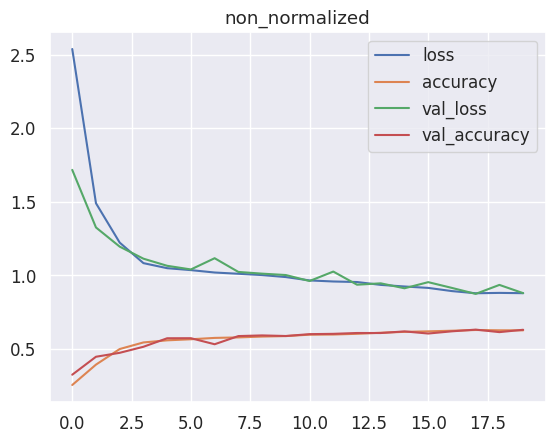

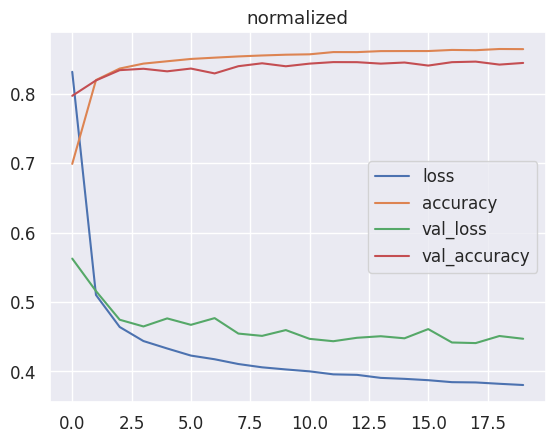

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title='non_normalized') ## this with non normalized data

pd.DataFrame(model_5_performance.history).plot(title='normalized') ## this with normalized data

## Finding the ideal Learinig Rate

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_6.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

## Callback has to done before the fitting the model:-
""" At the beginning of every epoch,
this callback gets the updated learning rate value from schedule function provided at __init__,
with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.
"""
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_6_performance = model_6.fit(train_data_norm, train_labels, epochs=20, callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4340 - accuracy: 0.4640 - lr: 1.0000e-04
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7584 - accuracy: 0.7391 - lr: 1.1220e-04
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6291 - accuracy: 0.7890 - lr: 1.2589e-04
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5644 - accuracy: 0.8116 - lr: 1.4125e-04
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5238 - accuracy: 0.8229 - lr: 1.5849e-04
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4953 - accuracy: 0.8307 - lr: 1.7783e-04
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4754 - accuracy: 0.8373 - lr: 1.9953e-04
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4592 - accuracy: 0.8409 - lr: 2.2387e-04
Epoch 9/20
1875/1875 [==========================

<Axes: >

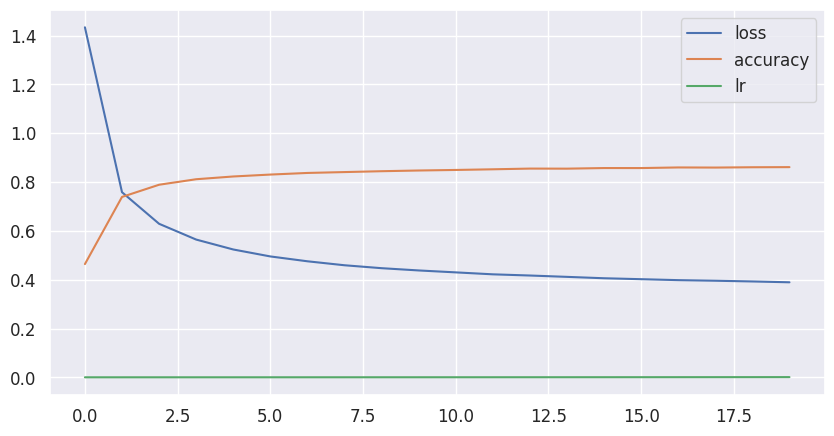

In [ ]:
pd.DataFrame(model_6_performance.history).plot(figsize=(10,5))

Text(0.5, 1.0, 'Learning rate vs Loss')

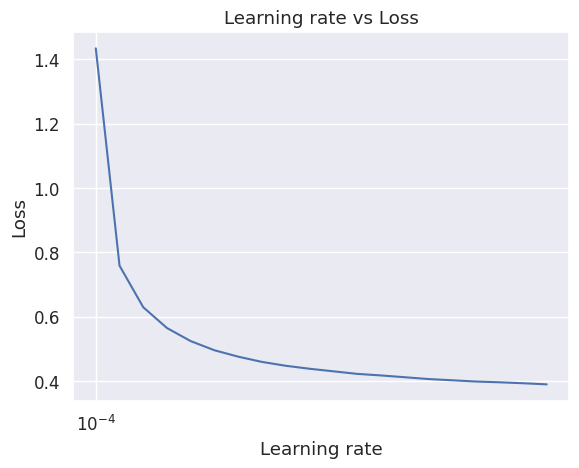

In [ ]:
## Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(20)/20))
plt.semilogx(lrs, model_6_performance.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

**Coding the model with `ideal` learning rate**

In [ ]:
10**-3

0.001

In [231]:
tf.random.set_seed(42)

model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_7.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

model_7_performance = model_7.fit(train_data_norm, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7834 - accuracy: 0.7312
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4854 - accuracy: 0.8321
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4401 - accuracy: 0.8440
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8509
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4038 - accuracy: 0.8550
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3919 - accuracy: 0.8591
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3850 - accuracy: 0.8612
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3775 - accuracy: 0.8638
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3725 - accuracy: 0.8648
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.36

In [232]:
## Evaluating the model

model_7.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8570


[0.40716639161109924, 0.8569999933242798]

<Axes: >

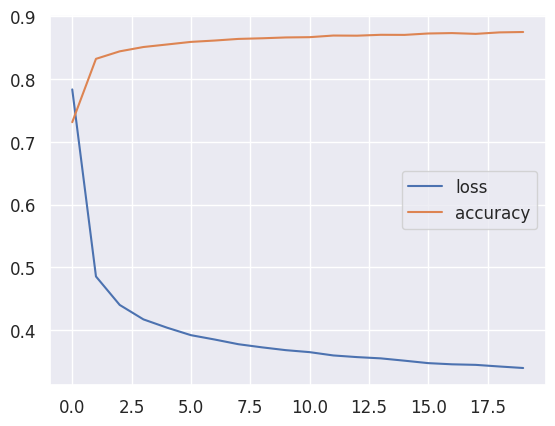

In [233]:
pd.DataFrame(model_7_performance.history).plot()

In [245]:
model_7_pred = model_7.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [246]:
model_7_pred[0] ## these values will be percentage of likelyhood of the classes, maximum value will be finalized as likelyhood of the **ideal** one

array([2.1726729e-10, 8.4775471e-11, 3.1757950e-15, 5.5181817e-11,
       3.5790242e-14, 1.6595602e-02, 2.1210573e-07, 5.3698443e-02,
       4.2717735e-04, 9.2927861e-01], dtype=float32)

In [247]:
print(tf.argmax(model_7_pred[0])) ## will gives the index of the maximum value in the list

tf.Tensor(9, shape=(), dtype=int64)


In [248]:
## Getting the class of the value
names[tf.argmax(model_7_pred[0])]

'Ankle Boot'

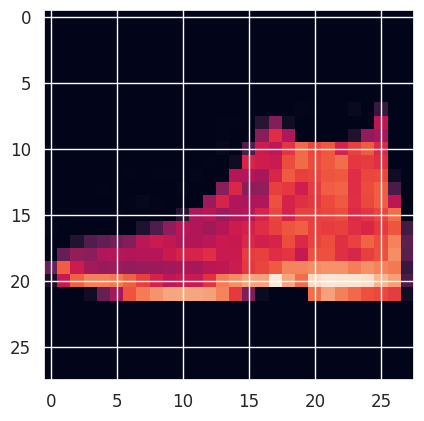

In [223]:
plt.imshow(test_data[0])

In [249]:
model_7_pred[0], len(model_7_pred)

(array([2.1726729e-10, 8.4775471e-11, 3.1757950e-15, 5.5181817e-11,
        3.5790242e-14, 1.6595602e-02, 2.1210573e-07, 5.3698443e-02,
        4.2717735e-04, 9.2927861e-01], dtype=float32),
 10000)

In [250]:
## Converting all of the prediction probabilities into integers
model_7_pred = np.argmax(model_7_pred, axis=1)

In [259]:
model_7_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, model_7_pred)

array([[803,   7,  10,  54,   3,   1, 116,   0,   6,   0],
       [  1, 962,   0,  26,   5,   0,   6,   0,   0,   0],
       [ 12,   1, 713,  13, 148,   0, 113,   0,   0,   0],
       [ 25,  16,   8, 868,  46,   0,  36,   0,   1,   0],
       [  0,   2,  80,  23, 823,   0,  72,   0,   0,   0],
       [  0,   0,   0,   0,   0, 933,   0,  39,   5,  23],
       [126,   6,  97,  37,  94,   0, 629,   0,  11,   0],
       [  0,   0,   0,   0,   0,  31,   0, 952,   0,  17],
       [  4,   1,   0,   9,   7,   4,  22,   3, 950,   0],
       [  1,   0,   0,   0,   0,  11,   1,  49,   1, 937]])

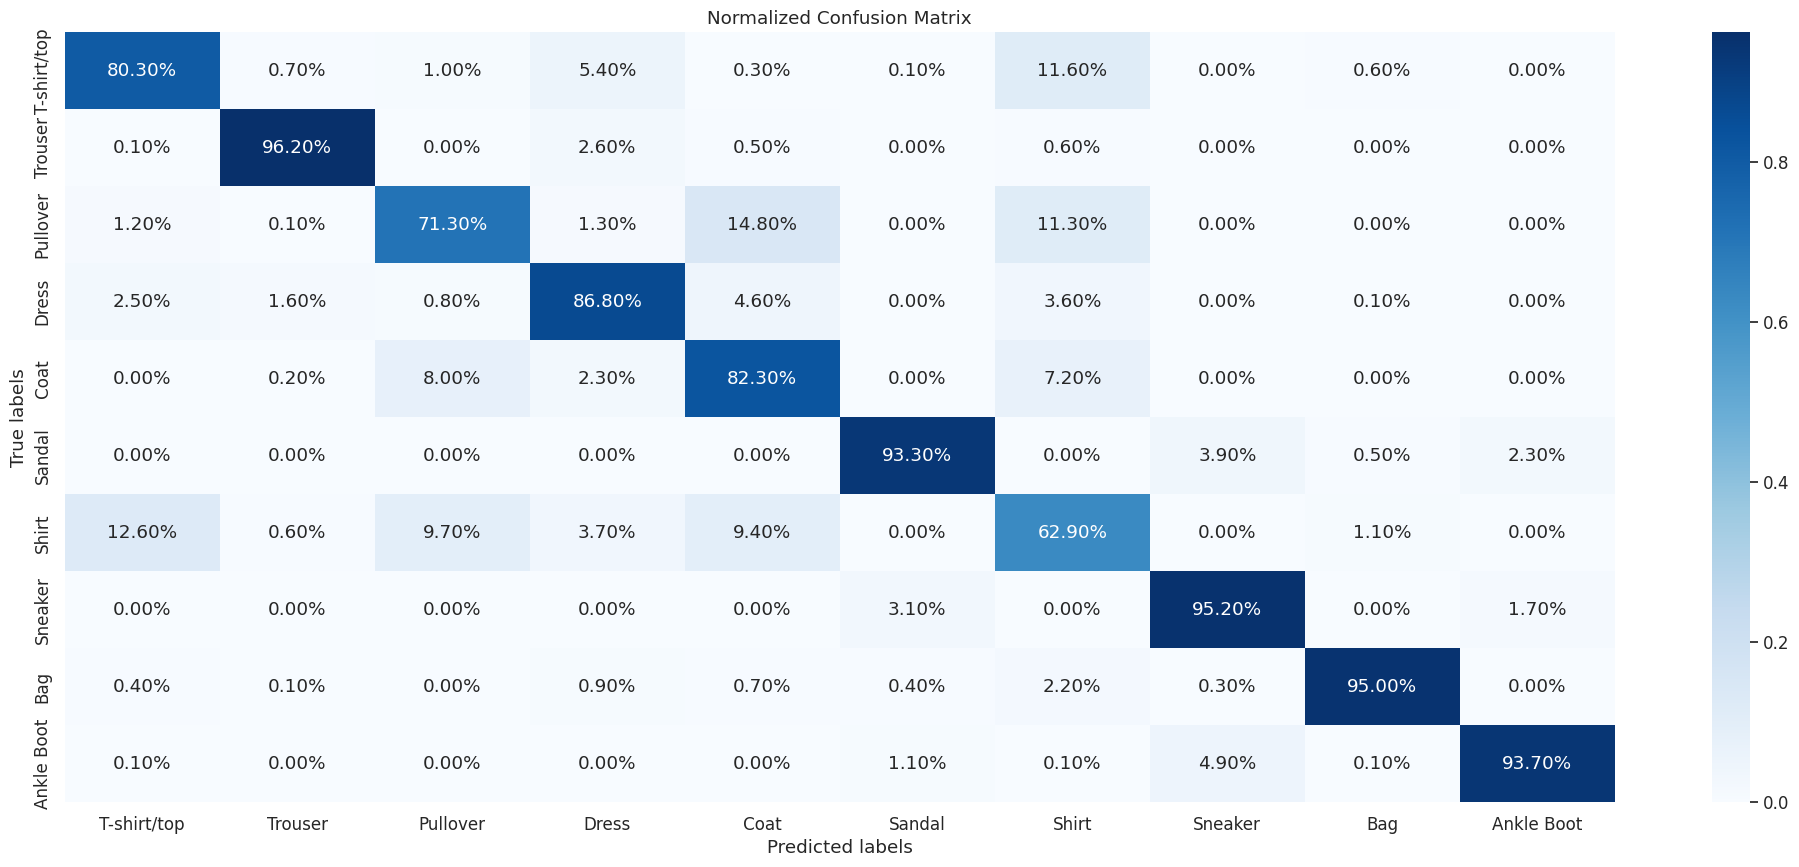

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_labels, model_7_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix as heatmap with percentages
plt.figure(figsize=(25, 10))
sns.set(font_scale=1.1)  # Adjust font scale for better readability
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=names, yticklabels=names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()


**Creating a fun little funciton for:**
* Plotting the random image
* Making prediction on said image
* Label the truth label and predicted label

In [356]:
import random
def random_plot():
  index = random.randint(0, 1000)
  fun_pred = model_7.predict(np.array([test_data_norm[index]]))
  plt.imshow(test_data[index], cmap=plt.cm.binary)
  pre_name = names[tf.squeeze(tf.argmax(fun_pred, axis=1))]
  act_name = names[test_labels[index]]

  color=''
  if str(pre_name) == str(act_name):
    color='green'
  else:
    color='red'

  plt.title(f"Pred: {pre_name} & (True: {pre_name})", color=color)
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


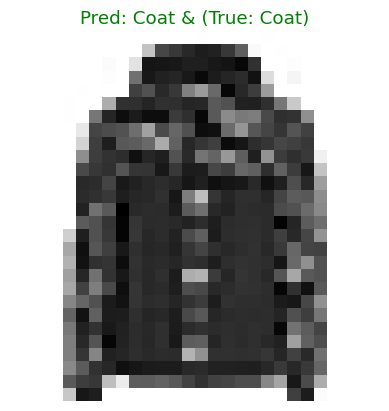

In [358]:
random_plot()

**What patterns our model learning?**

In [360]:
# Finda the layers of a model
model_7.layers

In [361]:
## Extracting a perticular layer
model_7.layers[0]

In [366]:
## Get patterns of a layer in our network
weights, biases = model_7.layers[1].get_weights()

## Shapes
weights, weights.shape

(array([[ 2.90287752e-02, -2.57175714e-01, -1.67771757e-01, ...,
         -1.01451434e-01,  1.99809209e-01, -2.75510341e-01],
        [ 1.36142626e-01,  6.00179136e-01,  7.19203651e-02, ...,
         -4.69461709e-01, -4.22841132e-01,  3.86146933e-01],
        [ 1.84902325e-02,  3.93563807e-01, -9.61298525e-01, ...,
         -5.61971426e-01,  2.70718217e-01,  4.28904027e-01],
        ...,
        [ 1.81598261e-01,  6.91344261e-01,  1.58518046e-01, ...,
          3.61700922e-01, -2.69907385e-01,  7.25355297e-02],
        [-6.66079894e-02,  8.53046000e-01,  8.02154168e-02, ...,
          3.42315942e-01, -4.20363754e-01, -3.12135845e-01],
        [-4.82810825e-01,  2.69166291e-01, -6.16850734e-01, ...,
         -8.88404474e-02, -5.66271603e-01,  9.52782982e-04]], dtype=float32),
 (784, 10))

(784, 10)
784 = 28 * 28 which is the shape of the input layer.

10 = is the nodes or neurons in the selected layer(in the above case hidden layer 1).

In [367]:
## biase and biases shapes

biases, biases.shape

(array([ 1.4293818 ,  0.8552389 , -0.38421544, -0.5270512 , -0.13876209,
        -0.26745072,  0.56755906,  0.6966099 , -0.17342955,  1.1050096 ],
       dtype=float32),
 (10,))

Every neuron has a bias vector. Each of these are paired with a weights matrix.

The bias vector get initialized with zeros.

The bias vector dictates how much the patterns within the curresponding weights matrix should influence the next layer.

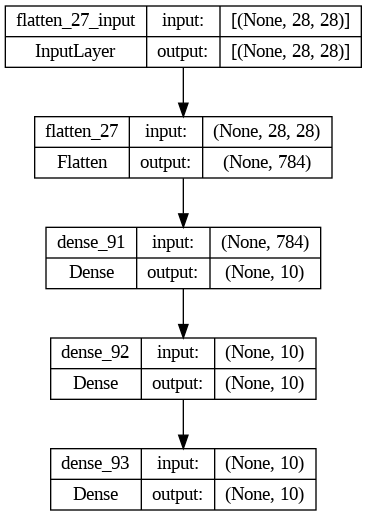

In [370]:
## Another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)